## Exercise Interpolation

In [2]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

1) Plot these four points (2,3), (3,1), (4,2), (5,2).

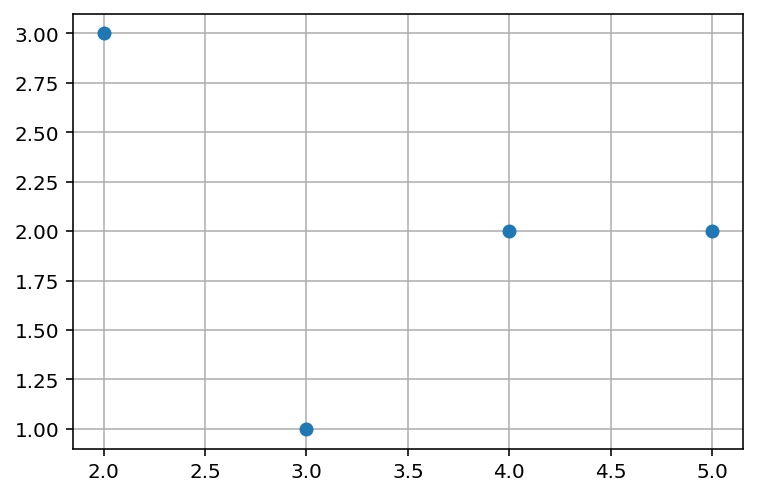

In [7]:
xs = np.array([2.,3,4,5])
ys = np.array([3.,1,2,2])
plt.plot(xs, ys, 'o')
plt.grid()

In [16]:

def w_factory(xs, i):
    def w(x):
        numerator = np.prod([ x-a for j, a in enumerate(xs) if i!=j ])
        denominator = np.prod([ xs[i]-a for j, a in enumerate(xs) if i!=j ])
        return numerator / denominator
    return w

w0 = w_factory(xs, 0) # -> polynomial that is 0 everywhere except at x[0]
print(w0(2), w0(3), w0(4), w0(5))

1.0 -0.0 0.0 -0.0


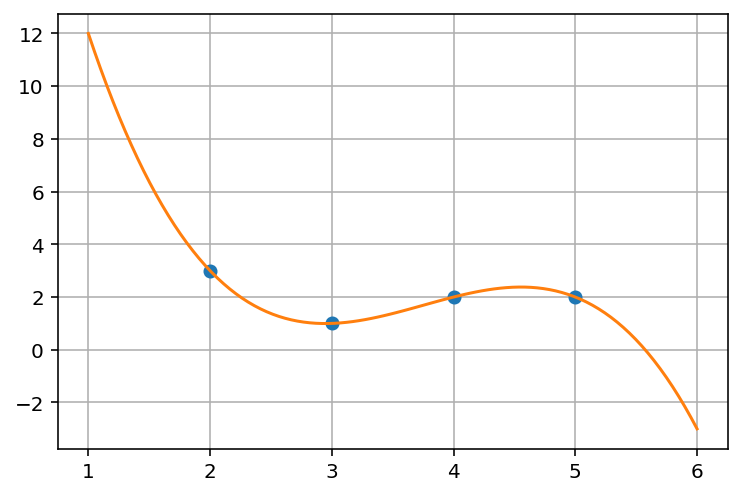

In [24]:
def lagrange_factory(xs, ys): # polynomial that pass through every xs,ys
    def lagrange(x):
        ws = [w_factory(xs, i) for i, _ in enumerate(xs)]
        return np.sum([y*ws[i](x) for i, y in enumerate(ys)])
    return lagrange

lg = lagrange_factory(xs, ys)
plt.plot(xs, ys, 'o')
plt.grid()
xxs = np.linspace(1, 6, 100)
plt.plot(xxs, [lg(x) for x in xxs])

In [10]:
justin = f(3.14) # justin is (float) -> (float)

justin(4.)

7.140000000000001

2) Find the polynomial of degree 3 that pass through these four points. Plot to verify.

In [11]:
justin(1.23)

4.37

3) Find polynomial of degree 3 that pass through these four points. Plot to verify.

(1,2) (2,0) (3,2) (7,1)

4) Write a function `ledendre(x)` which compute the legendre polynomial given the list of x values in xs and y values in ys.

`legendre(1.5)`

should have the same value as the polymial you found in 3) evaluated at x=1.5.

For those of you who know functional programming try write a functor that return a polynomial.

5) Now sample 11 points  from $f(x) = \sin(x)$ for for $x\in[0, \pi]$. Plot $\sin(x)$ along with those 11 points. Make sure your $\sin(x)$ is plotted with more than 100 points

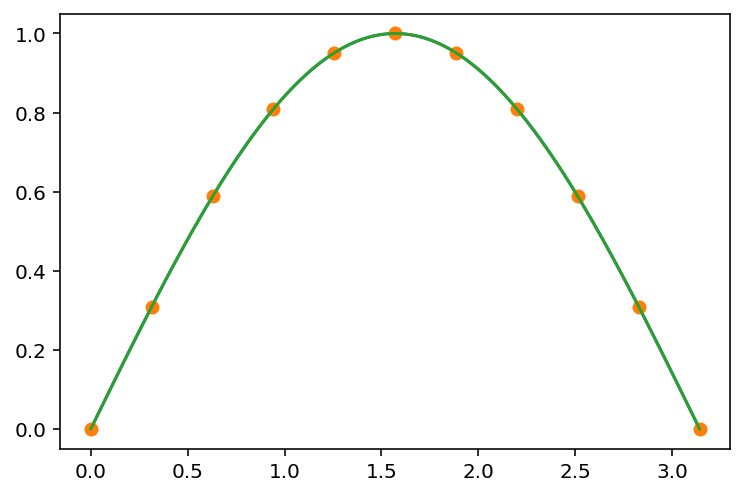

In [33]:
xs = np.linspace(0,np.pi, 100)
ys = np.sin(xs)
plt.plot(xs,ys)

samples = np.linspace(0, np.pi, 11)
y_samples = np.sin(samples)
plt.plot(samples, y_samples, 'o')


lg = lagrange_factory(samples, y_samples)
plt.plot(xs, [lg(x) for x in xs])

6) Plot legendre polynomial for these points. How similar is it to $\sin(x)$ function. Make sure your legendre is plotte with at least 100 points.

7) Now sample 11 points  from $f(x) = \sin(200x)$ for for $x\in[0, \pi]$. Plot $\sin(200*x)$ along with those 11 points. Note the 200. Then plot legendre polynomial for these points.

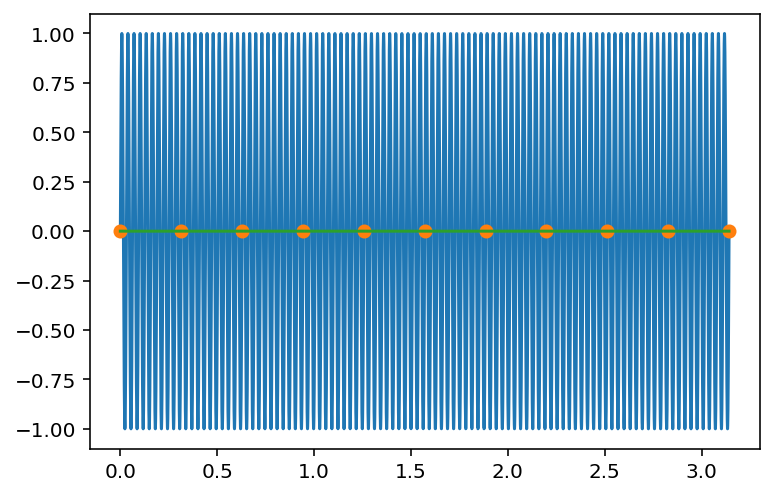

In [37]:
xs = np.linspace(0,np.pi, 10000)
ys = np.sin(200*xs)
plt.plot(xs,ys)

samples = np.linspace(0, np.pi, 11)
y_samples = np.sin(200*samples)
plt.plot(samples, y_samples, 'o')


lg = lagrange_factory(samples, y_samples)
plt.plot(xs, [lg(x) for x in xs])

8) Does it pass through all the point? Does it look like the original function?

## Exercise Integration

0) What is $$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

In [38]:
3**4/4 - 1/4

20.0

In [57]:
def f(x):
    return x**3

def trapz(f, l, r, n):
    dx = (r-l)/n
    return 0.5*dx*(f(l) + 2*sum(f(l+i*dx) for i in range(1,n)) + f(r))

1)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 1 piece.

In [58]:
trapz(f, 1, 3, 1)

28.0

2)Use Trapezoid Rule to calculate

$$ \int \limits_{x=1}^{x=3} x^3 \; dx $$

Using 100 pieces.

In [62]:
trapz(f, 1, 3, 10)

20.080000000000002

3) What is the bound on error for 1)?

In [54]:
3**4/4 - 1/4

20.0

4) What is the bound on error for 2)?

5) Compute the following integral
$$ \int \limits_{x=0}^{x=1} e^{-x} \sin(x^2) \; dx $$

using 100 sub divisions. This is one of those integral you can't do by hands. 

6) If we want compute
$$ \int \limits_{x=0}^{x=1} e^{-x} \; dx $$
that is at most $10^{-6}$ away from the real answer. How many subdivisions do we need?

7) Compute the integral above and make sure your answer is at most $10^{-6}$ away from the real answer. 